<a href="https://colab.research.google.com/github/bhuiyanmobasshir94/Made-With-ML/blob/main/machine-learning/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SEED = 1234
NUM_SAMPLES = 50

In [3]:
# Set seed for reproducibility
np.random.seed(SEED)

In [4]:
# Generate synthetic data
def generate_data(num_samples):
    """Generate dummy data for linear regression."""
    X = np.array(range(num_samples))
    print(f"X: {X}")
    random_noise = np.random.uniform(-10, 20, size=num_samples)
    print(f"random_noise: {random_noise}")
    y = 3.5*X + random_noise # add some noise
    return X, y

In [9]:
# Generate random (linear) data
X, y = generate_data(num_samples=NUM_SAMPLES)
print(f"X: {X}")
print(f"y: {y}")
data = np.vstack([X, y]).T
print (data[:5])

X: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
random_noise: [ 1.30134989e+01  1.12434609e+01  1.39060155e+01  6.73282485e+00
  1.89750960e+01 -5.58529300e+00 -9.11058998e+00  7.81680478e+00
 -6.57802904e+00  1.85242955e+01 -2.28777567e-01 -4.19143930e+00
  3.73434947e+00  1.76120771e+01  1.63720748e+01 -2.42152735e+00
  4.40263786e-01 -4.52233805e+00  1.70538815e+01  1.11958449e+01
  1.17997538e+01  1.70026351e+01  1.33749140e+01  7.97464342e+00
 -1.26624265e+00 -5.45814207e+00  5.52397745e-02  9.72655331e+00
 -7.79972369e+00 -8.34980814e+00 -3.04155582e-01  7.71445413e+00
  1.56169570e+01 -1.38812725e+00 -4.80798320e+00 -5.97936382e+00
  1.98396149e+01 -4.61506392e+00 -4.73595309e-01  7.04874214e+00
 -9.71954276e+00  1.70194586e+01  1.93172429e+01  6.70684037e+00
 -7.45678470e+00 -9.92602813e-03  1.18528603e+01 -5.72693880e+00
  6.57406818e+00 -1.80870221e+00]
X: [ 0  1  2  3

In [10]:
print(f"data shape: {data.shape}")
print(f"data size: {data.size}")

data shape: (50, 2)
data size: 100


In [11]:
# Load into a Pandas DataFrame
df = pd.DataFrame(data, columns=["X", "y"])
X = df[["X"]].values
y = df[["y"]].values
df.head()

,X,y
0,0.0,13.013499
1,1.0,14.743461
2,2.0,20.906016
3,3.0,17.232825
4,4.0,32.975096


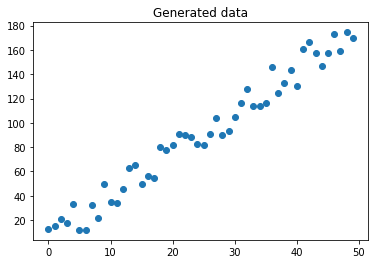

In [12]:
# Scatter plot
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

In [13]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [14]:
# Shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [15]:
# Split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [16]:
# Split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


In [17]:
def standardize_data(data, mean, std):
    return (data - mean)/std

In [18]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [19]:
# Standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [20]:
# Check (means should be ~0 and std should be ~1)
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: 0.3, std: 1.0
mean: 0.5, std: 0.9


In [21]:
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

In [22]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, 1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


In [23]:
# Forward pass [NX1] · [1X1] = [NX1]
y_pred = np.dot(X_train, W) + b
print (f"y_pred: {y_pred.shape}")

y_pred: (35, 1)


In [24]:
# Loss
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print (f"loss: {loss:.2f}")

loss: 1.02


In [25]:
# Backpropagation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

In [26]:
LEARNING_RATE = 1e-1

In [27]:
# Update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

In [28]:
NUM_EPOCHS = 100

In [29]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

# Training loop
for epoch_num in range(NUM_EPOCHS):

    # Forward pass [NX1] · [1X1] = [NX1]
    y_pred = np.dot(X_train, W) + b

    # Loss
    loss = (1/len(y_train)) * np.sum((y_train - y_pred)**2)

    # Show progress
    if epoch_num%10 == 0:
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    # Backpropagation
    dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
    db = -(2/N) * np.sum((y_train - y_pred) * 1)

    # Update weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db

Epoch: 0, loss: 0.993
Epoch: 10, loss: 0.044
Epoch: 20, loss: 0.033
Epoch: 30, loss: 0.033
Epoch: 40, loss: 0.033
Epoch: 50, loss: 0.033
Epoch: 60, loss: 0.033
Epoch: 70, loss: 0.033
Epoch: 80, loss: 0.033
Epoch: 90, loss: 0.033


In [30]:
# Predictions
pred_train = W*X_train + b
pred_test = W*X_test + b

In [31]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.03, test_MSE: 0.06


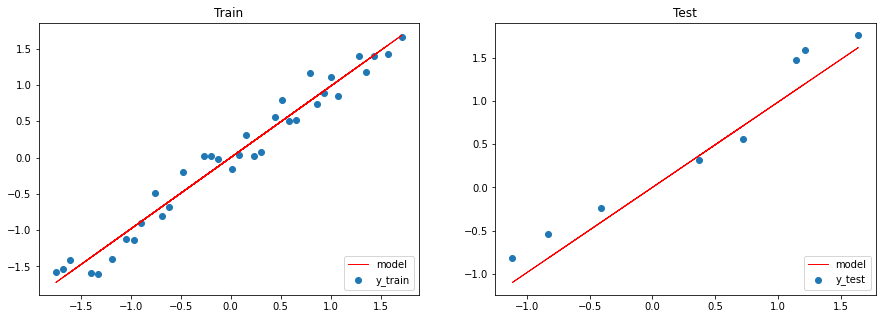

In [32]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()